In [5]:
import numpy as np
import torch
import torchviz
import matplotlib.pyplot as plt

from torch import optim, nn

## 1. Исходные данные для моделирования

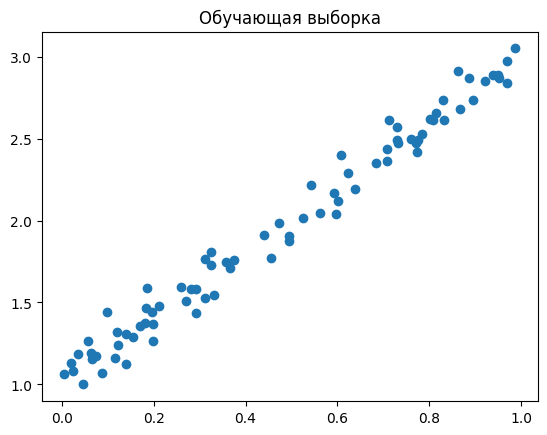

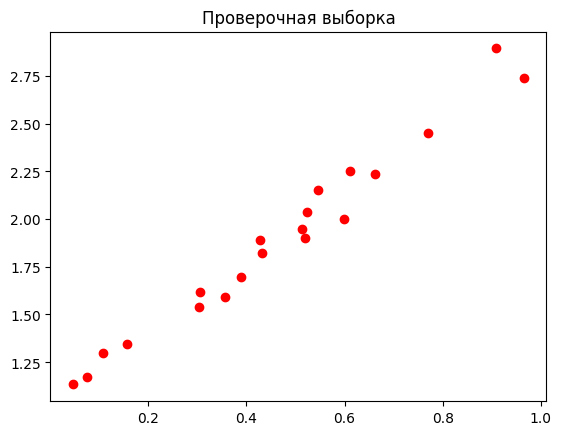

In [3]:
# инициализация повторяемой последовательности случайных чисел
np.random.seed(42)

# создаём np-массив из 100 случайных чисел в диапазоне 0..1
sz = 100
x = np.random.rand(sz, 1)

# строим функцию y = f(x) и добавляем немного гауссова шума
y = 1 + 2 * x + 0.1 * np.random.randn(sz, 1)

# формируем индексы от 0 до 99
idx = np.arange(sz)
# случайно их тасуем
np.random.shuffle(idx)

# первые 80 случайных индексов (значений x) используем для обучения
sz80 = (int)(sz*0.8)
train_idx = idx[: sz80]

# оставшиеся 20 -- для валидации
val_idx = idx[sz80:]

# формируем наборы обучающих данных
x_train, y_train = x[train_idx], y[train_idx]
# и наборы для валидации
x_val, y_val = x[val_idx], y[val_idx]

# выводим на экран
plt.scatter(x_train, y_train)
plt.title('Обучающая выборка')
plt.show()
plt.scatter(x_val, y_val, color= "red")
plt.title('Проверочная выборка')
plt.show()

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Наши исходные данные хранятся в формате массивов NumPy,
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)
print(x_train_tensor.type())

torch.cuda.FloatTensor


## Задание 2

Измените в данном шаблоне прогноз на основе линейной регрессии на более сложную зависимость.

С функциями прогноза какой сложности сможет уверенно справиться наш простой базовый шаблон PyTorch?

**Решение:**

В самом базовом виде мы можем усложнить зависимость с помощью различных вариаций степенной функции x^a.

Также мы можем построить полиномиальные или нелинейные модели (синус, логарифм).
Однако, такая базовая структура модели потребует некоторых структурных изменений.

Внесём небольшие модификации и построить **полиномиальную регрессию 2-й степени**.

### Полином 2-й степени

In [61]:
torch.manual_seed(42)

a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
c = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b, c)

# скорость обучения
lr = 0.1
# количество эпох
n_epochs = 1000

# функция расчёта лосса
loss_fn = nn.MSELoss(reduction='mean')

# создаём SGD оптимизатор для автоматического обновления параметров
optimizer = optim.SGD([a, b, c], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor**2 + c * x_train_tensor
    loss = loss_fn(yhat, y_train_tensor)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

print(a, b, c)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True) tensor([-0.5187], device='cuda:0', requires_grad=True)
tensor([1.1488], device='cuda:0', requires_grad=True) tensor([0.8112], device='cuda:0', requires_grad=True) tensor([1.1600], device='cuda:0', requires_grad=True)


In [62]:
# Лучшее значение ошибки модели
yhat = a + b * x_train_tensor**2 + c * x_train_tensor

loss = loss_fn(yhat, y_train_tensor)
print("Ошибка модели:", loss)

Ошибка модели: tensor(0.0099, device='cuda:0', grad_fn=<MseLossBackward0>)
